In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../datos/attack.csv')

¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [4]:
fatales_paises = pd.DataFrame(df.groupby('country')['case_number'].count())
fatales_paises.reset_index(inplace=True)
fatales_paises.sort_values(by = 'case_number', ascending=False, inplace=True)

<AxesSubplot:xlabel='country', ylabel='case_number'>

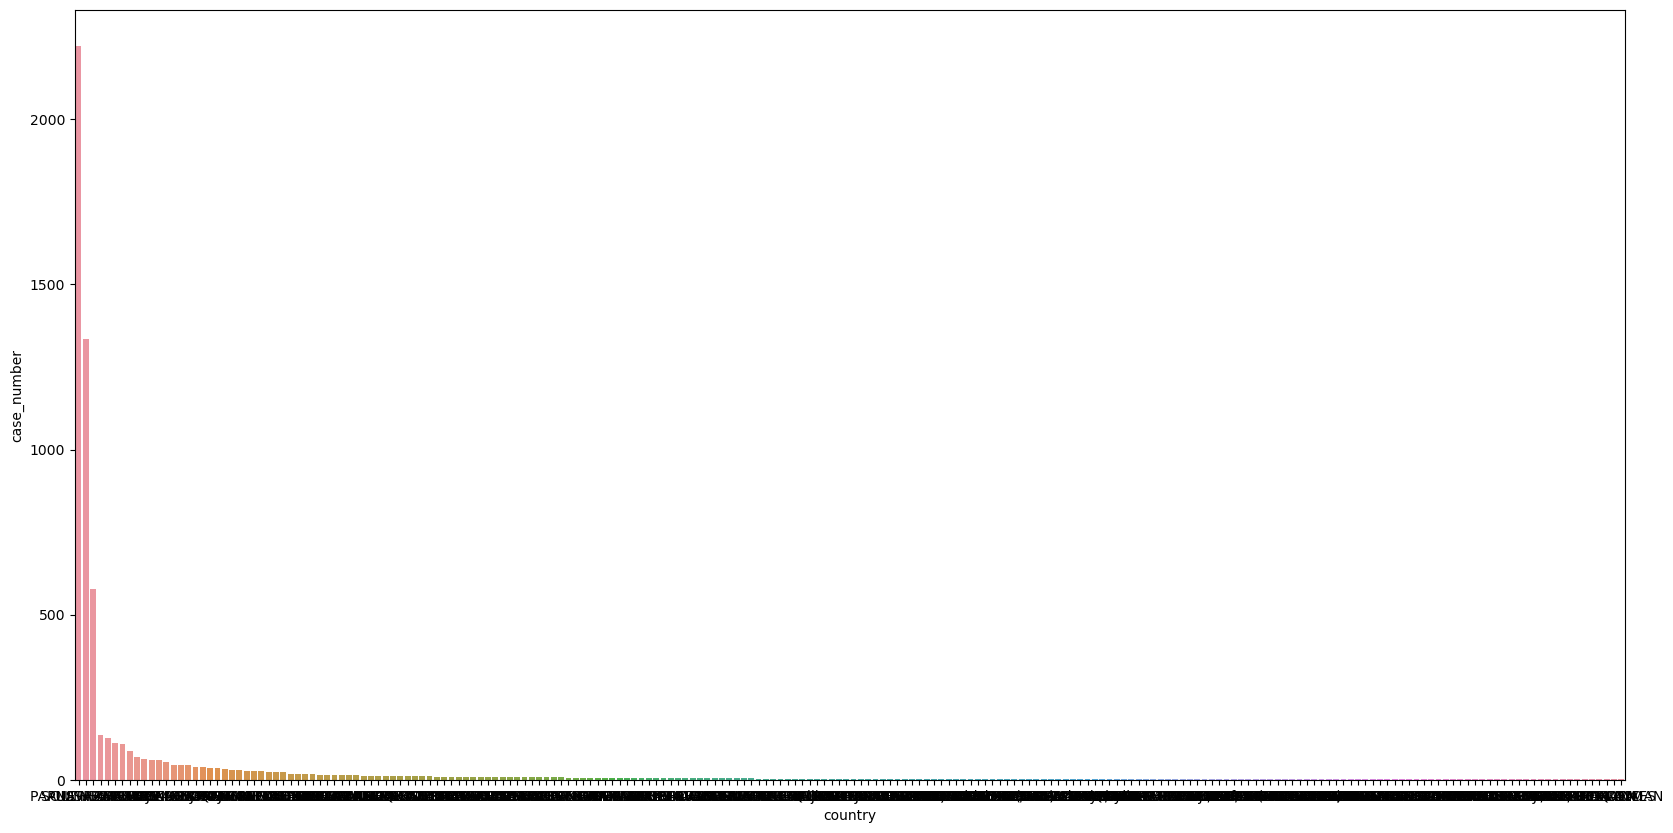

In [5]:
plt.figure(figsize=(20,10))

sns.barplot(data=fatales_paises, x='country', y='case_number')

In [6]:
fatales_paises[:11]

,country,case_number
204,USA,2221
14,AUSTRALIA,1335
171,SOUTH AFRICA,577
145,PAPUA NEW GUINEA,134
127,NEW ZEALAND,127
23,BRAZIL,112
16,BAHAMAS,109
113,MEXICO,88
90,ITALY,70
61,FIJI,62


<AxesSubplot:xlabel='country', ylabel='case_number'>

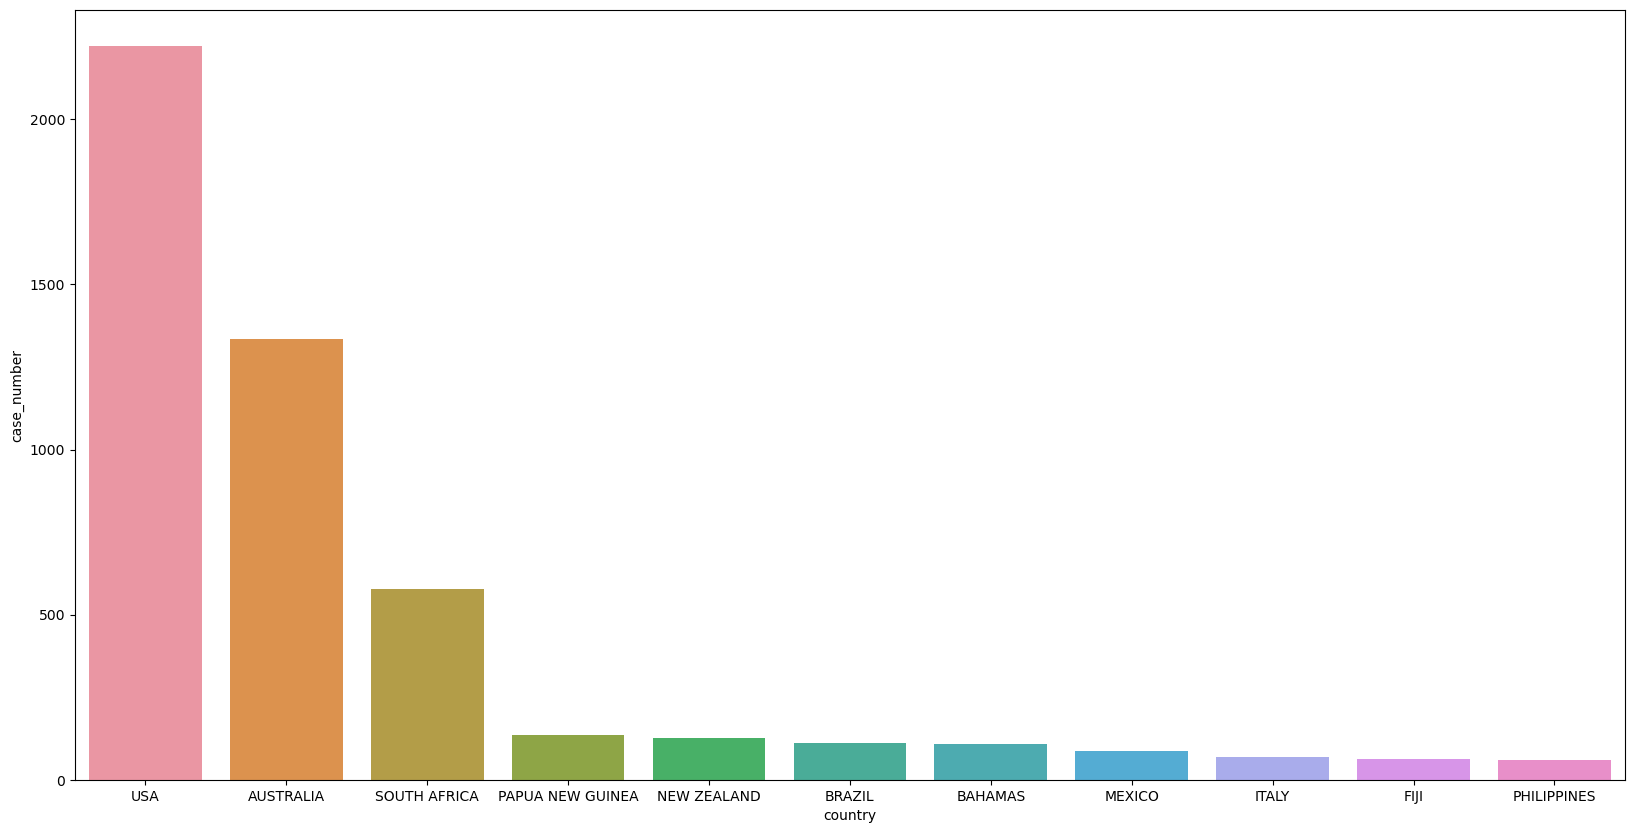

In [7]:
plt.figure(figsize=(20,10))

sns.barplot(data=fatales_paises[:11], x='country', y='case_number')

Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

In [8]:
ataques_sex_pais = pd.DataFrame(df.groupby(['country', 'sex2'])['case_number'].count())
ataques_sex_pais.reset_index(inplace=True)
ataques_sex_pais.sort_values(by = 'case_number', ascending=False, inplace=True)

<AxesSubplot:xlabel='country', ylabel='case_number'>

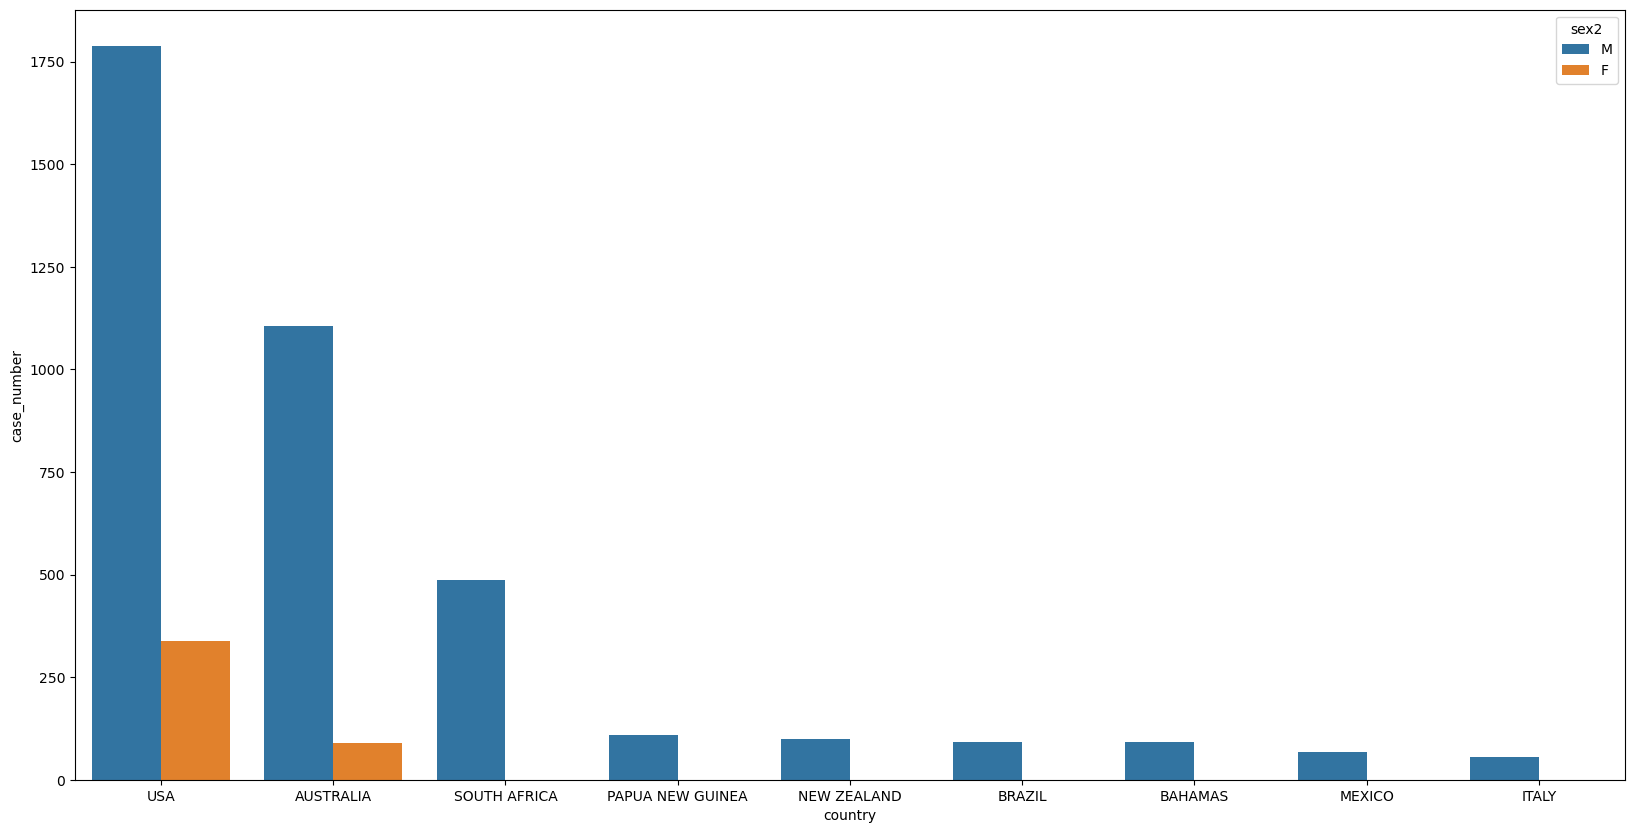

In [9]:
plt.figure(figsize=(20,10))

sns.barplot(data=ataques_sex_pais[:11], x='country', y='case_number', hue='sex2')

¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [ ]:
bins = np.arange(18, 64+5, 5)
df["age_group"] = pd.cut(df["age"], bins=bins)
plt.figure(figsize =(8,4))
fig = sns.boxplot(x= 'age_group', y ='cantidad de ataques', data = df)
fig.set(xlabel='Edad', ylabel= 'Cantidad de ataques')
fig.set_title('Gráfico de barras del número de ataques según la edad')
plt.show() 

Ataques entre sexos, ¿hay diferencia?

In [ ]:
sexo = pd.DataFrame(df.groupby('sex2')['case_number'].count())
sexo.reset_index(inplace=True)
sexo.sort_values(by='case_number', ascending=False)

¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

<AxesSubplot:xlabel='mes', ylabel='count'>

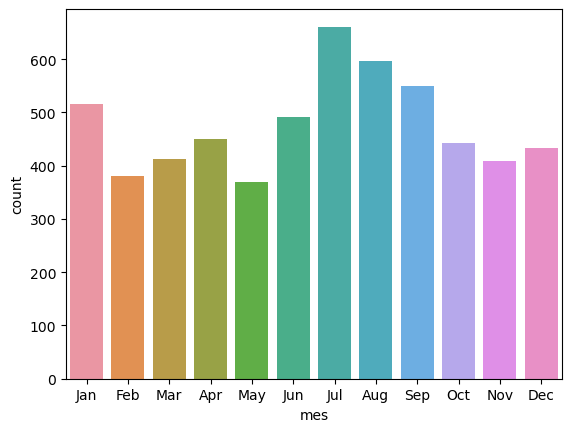

In [10]:
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(data=df, x='mes', order=meses)

In [25]:
df['mes'].unique() #hay que limpiar para que desaparezca la palabra mid. 

array([nan, 'May', 'Sep', 'Jul', 'Aug', 'Dec', 'Mar', 'Oct', 'Apr', 'Jan',
       'Jun', 'Feb', 'Nov', 'Mid'], dtype=object)